In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [77]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.shape

(768, 9)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
data.isna().count()
data.fillna(data.median())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.isnull().values.any()

False

<AxesSubplot:>

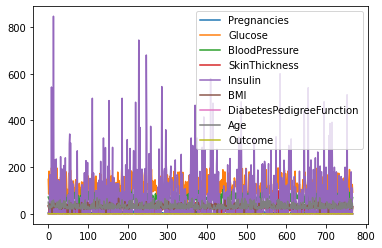

In [108]:
data.plot()

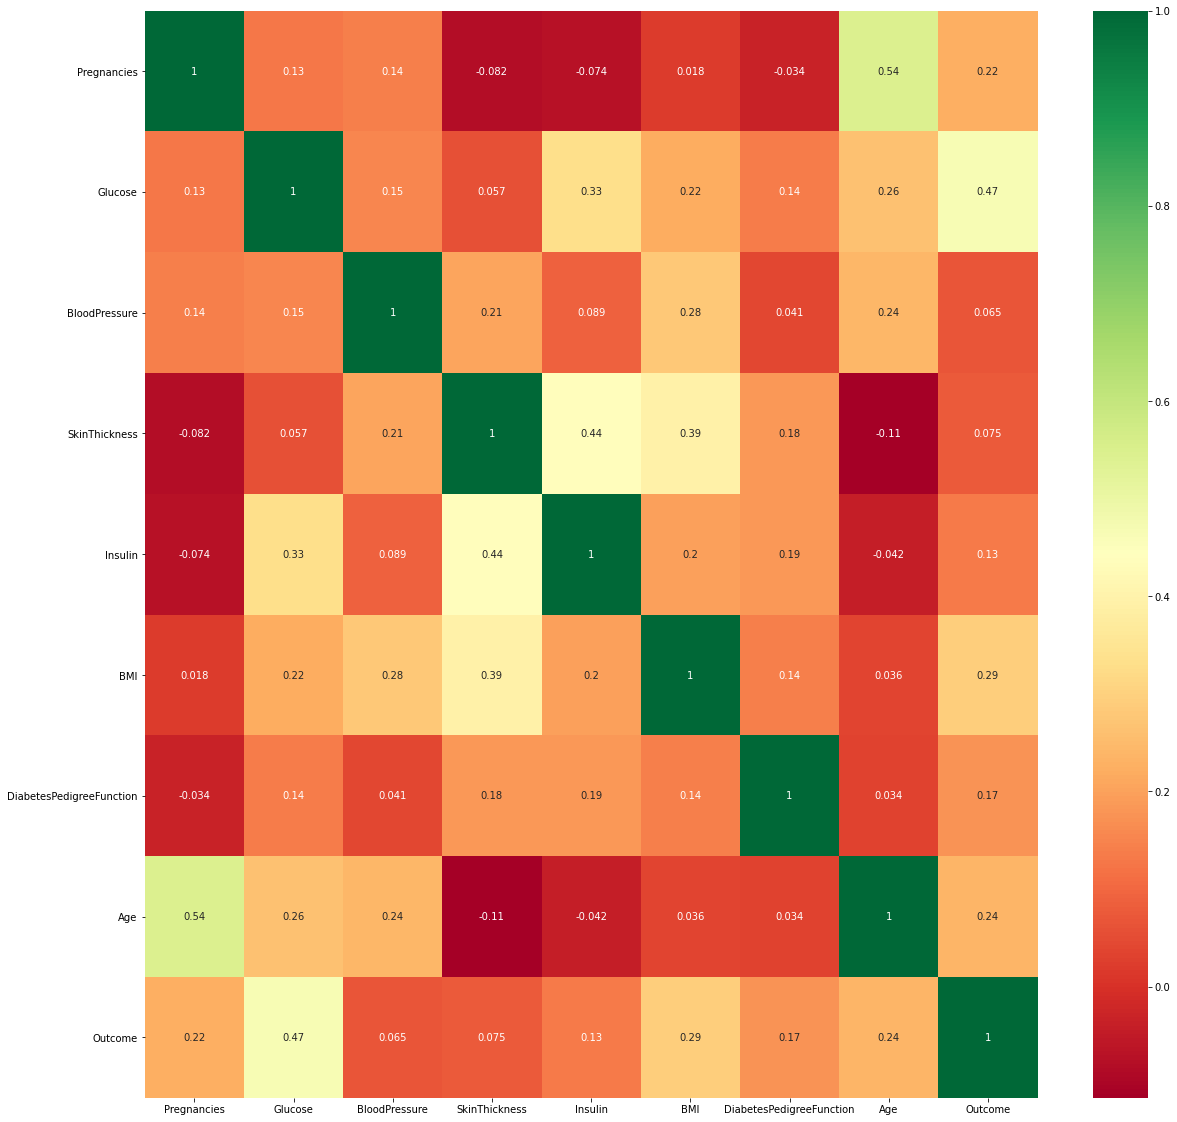

In [6]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [97]:
diabetes_map = {True: 1, False: 0}
data.describe()
medi = data['DiabetesPedigreeFunction'].mean()

In [98]:
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].apply(lambda x : 1 if x > medi else 0)

In [83]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,1,50,1
1,1,85,66,29,0,26.6,0,31,0
2,8,183,64,0,0,23.3,1,32,1
3,1,89,66,23,94,28.1,0,21,0
4,0,137,40,35,168,43.1,1,33,1


In [14]:
diabetes_true_count = len(data.loc[data['DiabetesPedigreeFunction'] == True])
diabetes_false_count = len(data.loc[data['DiabetesPedigreeFunction'] == False])

In [15]:
(diabetes_true_count,diabetes_false_count)

(0, 0)

In [99]:
## Train Test Split

from sklearn.model_selection import train_test_split
predicted_class = ['DiabetesPedigreeFunction']

In [104]:
X = data.drop(predicted_class, axis=1)
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [86]:
print("total number of rows : {0}".format(len(data)))

print("number of rows missing Glucose_Concentration: {0}".format(len(data.loc[data['Glucose'] == 0])))

print("number of rows missing Diastolic_BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))

print("number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))

print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))

print("number of rows missing Diabetes_prediction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))

print("number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))

print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing Glucose_Concentration: 5
number of rows missing Diastolic_BloodPressure: 35
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing Diabetes_prediction: 384
number of rows missing Age: 0
number of rows missing SkinThickness: 227


Deprecated

In [71]:
from sklearn.impute import SimpleImputer
import numpy as np

fill_values = SimpleImputer(missing_values=np.nan, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [105]:
## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())


RandomForestClassifier(random_state=10)

In [106]:
pred = random_forest_model.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

0.5714285714285714
              precision    recall  f1-score   support

           0       0.54      0.61      0.58       109
           1       0.61      0.53      0.57       122

    accuracy                           0.57       231
   macro avg       0.57      0.57      0.57       231
weighted avg       0.58      0.57      0.57       231

[[67 42]
 [57 65]]


In [96]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()

LG.fit(X_train, y_train.ravel())


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))